1) Write a python program to implement XOR gate using a multi layer
perceptron learning rule.

In [ ]:
def step_fn(x, threshold=0.5):
    return 1 if x >= threshold else 0

def mlp_xor():
    # XOR truth table
    data = [
        ([0,0], 0),
        ([0,1], 1),
        ([1,0], 1),
        ([1,1], 0)
    ]

    eta = 1.5  # learning rate

    # --- Initial weights (fixed like before: 0.6) ---
    # Hidden layer: 2 neurons (each has 2 inputs + bias)
    w_hidden = [
        [1, 1],  # weights for hidden neuron h1
        [1, 1]   # weights for hidden neuron h2
    ]
    b_hidden = [0.0, 0.0]  # biases for hidden neurons

    # Output neuron (2 inputs from hidden layer + bias)
    w_output = [0.6, 0.6]
    b_output = 0.0

    print("Initial Weights:")
    print(f"Hidden: {[ [round(w,2) for w in ws] for ws in w_hidden ]}, Bias={ [round(b,2) for b in b_hidden ]}")
    print(f"Output: {[round(w,2) for w in w_output]}, Bias={round(b_output,2)}")

    step = 1
    for epoch in range(100):   # loop until XOR learned
        error_count = 0
        for x, target in data:
            # --- Forward pass ---
            h_net = [sum(w*x_i for w, x_i in zip(ws, x)) + b
                     for ws, b in zip(w_hidden, b_hidden)]
            h_out = [step_fn(v) for v in h_net]

            o_net = sum(w*h for w, h in zip(w_output, h_out)) + b_output
            y = step_fn(o_net)

            error = target - y

            if error != 0:
                error_count += 1
                # --- Update output layer weights ---
                old_w_output = w_output[:]
                old_b_output = b_output
                w_output = [w + eta * error * h for w, h in zip(w_output, h_out)]
                b_output = b_output + eta * error

                # print(f"Update {step} (Output): x={x}, target={target}, y={y}, "
                #       f"weights { [round(w,2) for w in old_w_output] }->{ [round(w,2) for w in w_output] }, "
                #       f"bias {round(old_b_output,2)}->{round(b_output,2)}")
                step += 1

                # --- Update hidden layer weights ---
                for i in range(len(w_hidden)):
                    old_w = w_hidden[i][:]
                    old_b = b_hidden[i]
                    w_hidden[i] = [w + eta * error * x_j for w, x_j in zip(w_hidden[i], x)]
                    b_hidden[i] = b_hidden[i] + eta * error
                    # print(f"   Hidden{i+1} updated: { [round(w,2) for w in old_w] }->{ [round(w,2) for w in w_hidden[i]] }, "
                    #       f"bias {round(old_b,2)}->{round(b_hidden[i],2)}")

        if error_count == 0:  # stop if perfect
            break

    # --- Final check ---
    print("\nFinal Weights:")
    print(f"Hidden: {[ [round(w,2) for w in ws] for ws in w_hidden ]}, Bias={ [round(b,2) for b in b_hidden ]}")
    print(f"Output: {[round(w,2) for w in w_output]}, Bias={round(b_output,2)}")

    print("\nFinal checks:")
    for x, target in data:
        h_net = [sum(w*x_i for w, x_i in zip(ws, x)) + b
                 for ws, b in zip(w_hidden, b_hidden)]
        h_out = [step_fn(v) for v in h_net]
        o_net = sum(w*h for w, h in zip(w_output, h_out)) + b_output
        y = step_fn(o_net)
        print(f"x={x}, hidden_out={h_out}, net={round(o_net,2)}, y={y}, target={target}")


mlp_xor()


Initial Weights:
Hidden: [[1, 1], [1, 1]], Bias=[0.0, 0.0]
Output: [0.6, 0.6], Bias=0.0

Final Weights:
Hidden: [[-144.5, -0.5], [-144.5, -0.5]], Bias=[0.0, 0.0]
Output: [0.6, 0.6], Bias=0.0

Final checks:
x=[0, 0], hidden_out=[0, 0], net=0.0, y=0, target=0
x=[0, 1], hidden_out=[0, 0], net=0.0, y=0, target=1
x=[1, 0], hidden_out=[0, 0], net=0.0, y=0, target=1
x=[1, 1], hidden_out=[0, 0], net=0.0, y=0, target=0


2) Implement a Multi layer perceptron using a tensorflow library and calculate
the accuracy of the model on the testing data. (Use MNIST dataset).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize inputs to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build MLP model with sigmoid activations
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')  # output layer
])

# Compile with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6567 - loss: 1.3701 - val_accuracy: 0.9272 - val_loss: 0.2990
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9156 - loss: 0.3137 - val_accuracy: 0.9472 - val_loss: 0.1974
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9366 - loss: 0.2235 - val_accuracy: 0.9597 - val_loss: 0.1567
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9490 - loss: 0.1727 - val_accuracy: 0.9652 - val_loss: 0.1310
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9596 - loss: 0.1406 - val_accuracy: 0.9662 - val_loss: 0.1171
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9656 - loss: 0.1193 - val_accuracy: 0.9690 - val_loss: 0.1054
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9718 - loss: 0.0997 - val_accuracy: 0.9707 - val_loss: 0.1000
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9757 - loss: 0.0849 - val_accuracy: 0.

3) Write a python program to implement handwritten digit classification using
ANN. (Use MNIST dataset)


Training with adam optimizer:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 - 4s - 8ms/step - accuracy: 0.8996 - loss: 0.3583 - val_accuracy: 0.9560 - val_loss: 0.1625
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9556 - loss: 0.1488 - val_accuracy: 0.9713 - val_loss: 0.1056
Epoch 3/10
422/422 - 2s - 6ms/step - accuracy: 0.9694 - loss: 0.1017 - val_accuracy: 0.9730 - val_loss: 0.0971
Epoch 4/10
422/422 - 3s - 8ms/step - accuracy: 0.9776 - loss: 0.0759 - val_accuracy: 0.9745 - val_loss: 0.0859
Epoch 5/10
422/422 - 4s - 10ms/step - accuracy: 0.9817 - loss: 0.0604 - val_accuracy: 0.9768 - val_loss: 0.0791
Epoch 6/10
422/422 - 3s - 6ms/step - accuracy: 0.9860 - loss: 0.0469 - val_accuracy: 0.9795 - val_loss: 0.0778
Epoch 7/10
422/422 - 3s - 7ms/step - accuracy: 0.9883 - loss: 0.0390 - val_accuracy: 0.9730 - val_loss: 0.0945
Epoch 8/10
422/422 - 4s - 8ms/step - accuracy: 0.9908 - loss: 0.0315 - val_accuracy: 0.9762 - val_loss: 0.0868
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9783 - val_loss: 0.0808


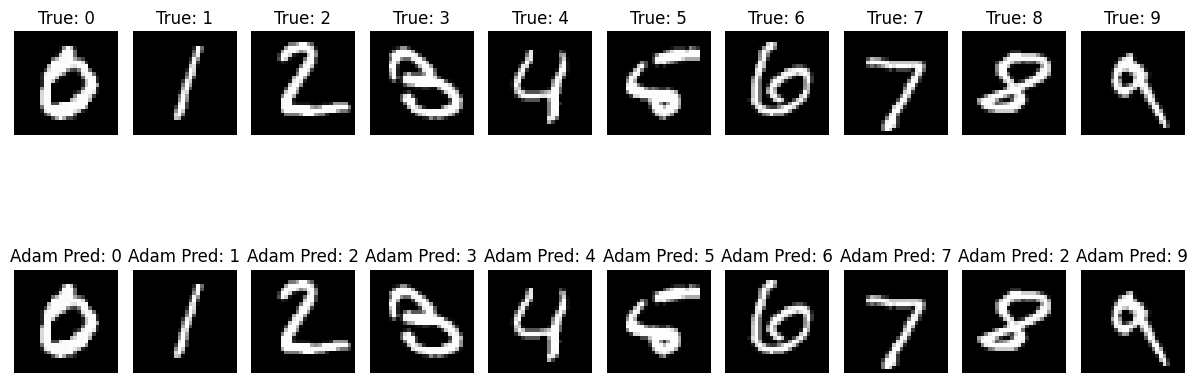

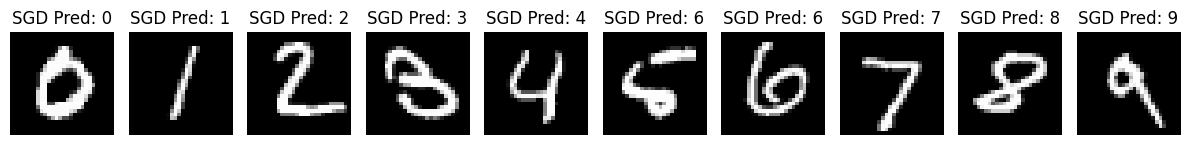

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input images to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def train_and_evaluate(optimizer_name):
    print(f"\nTraining with {optimizer_name} optimizer:")
    model = create_model()
    model.compile(optimizer=optimizer_name,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.1, verbose=2)
    loss, accuracy = model.evaluate(x_test, y_test_one_hot, verbose=0)
    print(f"Test accuracy with {optimizer_name}: {accuracy:.4f}")
    return model

# Train and evaluate with Adam optimizer
adam_model = train_and_evaluate('adam')

# Train and evaluate with SGD optimizer
sgd_model = train_and_evaluate('sgd')


# --- Prediction and Visualization ---

# Find one example for each digit (0-9) in the test set
sample_indices = []
for i in range(10):
    indices = np.where(y_test == i)[0]
    sample_indices.append(indices[0]) # Take the first occurrence of each digit

sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Predict using both models
adam_predictions = adam_model.predict(sample_images)
sgd_predictions = sgd_model.predict(sample_images)

# Get predicted digit (index of the max probability)
adam_predicted_digits = np.argmax(adam_predictions, axis=1)
sgd_predicted_digits = np.argmax(sgd_predictions, axis=1)

# Plot the results
plt.figure(figsize=(12, 6))

for i in range(10):
    # Original Image
    plt.subplot(2, 10, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}")
    plt.axis('off')

    # Adam Prediction
    plt.subplot(2, 10, i + 11)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Adam Pred: {adam_predicted_digits[i]}")
    plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
for i in range(10):
     # SGD Prediction
    plt.subplot(2, 10, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"SGD Pred: {sgd_predicted_digits[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

4) Write a python program to implement Regression Analysis using ANN. (Use
california_housing_train.csv)


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Separate features and target for training data
X_train = train_data.drop('median_house_value', axis=1).values
y_train = train_data['median_house_value'].values

# Separate features and target for testing data
X_test = test_data.drop('median_house_value', axis=1).values
y_test = test_data['median_house_value'].values

# Scale features for better training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normalize target (optional, but often helps regression)
y_mean = y_train.mean()
y_std = y_train.std()
y_train_norm = (y_train - y_mean) / y_std
y_test_norm = (y_test - y_mean) / y_std

# Build ANN model for regression
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output neuron for regression (no activation)
])

# Compile model with MSE loss and Adam optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(X_train, y_train_norm, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate on test data
mse, mae = model.evaluate(X_test, y_test_norm, verbose=0)
print(f"\nTest MSE: {mse:.4f}, Test MAE: {mae:.4f}")

# To get predictions back to original scale:
y_pred_norm = model.predict(X_test)
y_pred = y_pred_norm * y_std + y_mean

print(f"\nFirst 5 predicted house values: {y_pred[:5].flatten()}")
print(f"First 5 actual house values: {y_test[:5]}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
479/479 - 3s - 6ms/step - loss: 0.3716 - mae: 0.4379 - val_loss: 0.5588 - val_mae: 0.5553
Epoch 2/50
479/479 - 1s - 3ms/step - loss: 0.2612 - mae: 0.3634 - val_loss: 0.5438 - val_mae: 0.5548
Epoch 3/50
479/479 - 2s - 4ms/step - loss: 0.2486 - mae: 0.3515 - val_loss: 0.5525 - val_mae: 0.5409
Epoch 4/50
479/479 - 1s - 3ms/step - loss: 0.2382 - mae: 0.3413 - val_loss: 0.4647 - val_mae: 0.5230
Epoch 5/50
479/479 - 1s - 3ms/step - loss: 0.2291 - mae: 0.3349 - val_loss: 0.5612 - val_mae: 0.5614
Epoch 6/50
479/479 - 1s - 3ms/step - loss: 0.2259 - mae: 0.3315 - val_loss: 0.4831 - val_mae: 0.5137
Epoch 7/50
479/479 - 1s - 2ms/step - loss: 0.2209 - mae: 0.3271 - val_loss: 0.5127 - val_mae: 0.5485
Epoch 8/50
479/479 - 1s - 2ms/step - loss: 0.2176 - mae: 0.3232 - val_loss: 0.4933 - val_mae: 0.5342
Epoch 9/50
479/479 - 1s - 2ms/step - loss: 0.2125 - mae: 0.3185 - val_loss: 0.4220 - val_mae: 0.4843
Epoch 10/50
479/479 - 1s - 3ms/step - loss: 0.2104 - mae: 0.3169 - val_loss: 0.4158 - val_m

5) Write a python program to build a Feed forward Neural network using
Sigmoid activation function. (Use MNIST dataset)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
422/422 - 4s - 9ms/step - accuracy: 0.8104 - loss: 0.8483 - val_accuracy: 0.9283 - val_loss: 0.2953
Epoch 2/20
422/422 - 2s - 5ms/step - accuracy: 0.9209 - loss: 0.2853 - val_accuracy: 0.9450 - val_loss: 0.1939
Epoch 3/20
422/422 - 4s - 9ms/step - accuracy: 0.9388 - loss: 0.2132 - val_accuracy: 0.9543 - val_loss: 0.1597
Epoch 4/20
422/422 - 2s - 5ms/step - accuracy: 0.9501 - loss: 0.1727 - val_accuracy: 0.9650 - val_loss: 0.1337
Epoch 5/20
422/422 - 3s - 6ms/step - accuracy: 0.9583 - loss: 0.1439 - val_accuracy: 0.9673 - val_loss: 0.1156
Epoch 6/20
422/422 - 3s - 7ms/step - accuracy: 0.9648 - loss: 0.1215 - val_accuracy: 0.9693 - val_loss: 0.1058
Epoch 7/20
422/422 - 2s - 6ms/step - accuracy: 0.9696 - loss: 0.1042 - val_accuracy: 0.9735 - val_loss: 0.0918
Epoch 8/20
422/422 - 3s - 7ms/step - accuracy: 0.9746 - loss: 0.0895 - val_accuracy: 0.9737 - val_loss: 0.0881
Epoch 9/20
422/422 - 2s - 5ms/step - accuracy: 0.9779 - loss: 0.0773 - val_accuracy: 0.9743 - val_loss: 0.0860
E

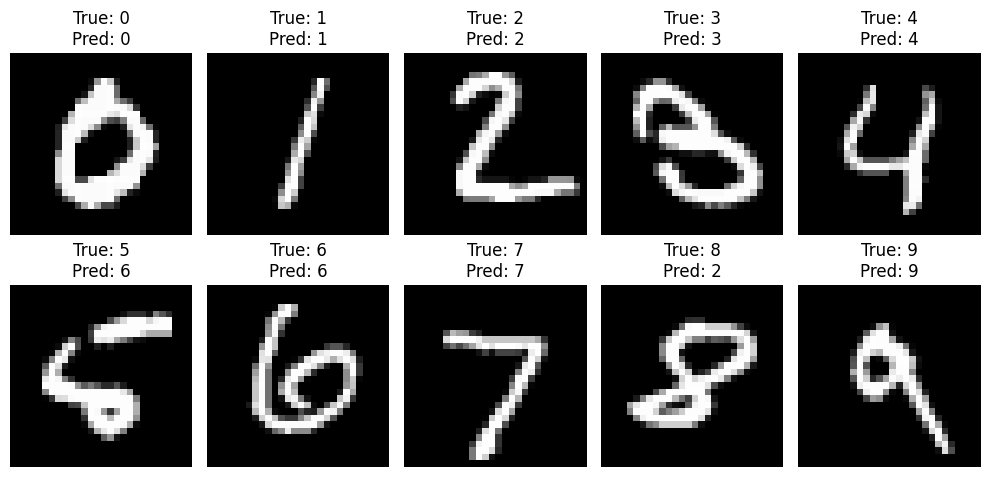

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize input images (scale pixels to [0,1])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build Feed Forward Neural Network model
model = Sequential([
    Flatten(input_shape=(28, 28)),              # Flatten 28x28 images to vector of size 784
    Dense(128, activation='sigmoid'),           # Hidden layer with 128 neurons + sigmoid activation
    Dense(64, activation='sigmoid'),            # Hidden layer with 64 neurons + sigmoid activation
    Dense(10, activation='softmax')              # Output layer for 10 classes with softmax activation
])

# Compile model with categorical crossentropy loss and adam optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1, verbose=2)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {accuracy * 100:.2f}%")

# --- Prediction and Visualization ---

# Find one example for each digit (0-9) in the test set
sample_indices = []
for i in range(10):
    indices = np.where(np.argmax(y_test, axis=1) == i)[0]
    sample_indices.append(indices[0]) # Take the first occurrence of each digit

sample_images = X_test[sample_indices]
sample_labels = np.argmax(y_test[sample_indices], axis=1)

# Predict using the trained model
predictions = model.predict(sample_images)

# Get predicted digit (index of the max probability)
predicted_digits = np.argmax(predictions, axis=1)

# Plot the results
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPred: {predicted_digits[i]}")
    plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

Set B (Practice Assignment)
1) Write a python program to implement XNOR gate using a multi layer
perceptron learning rule.

In [7]:
def step_fn(x, threshold=0.5):
    return 1 if x >= threshold else 0

def mlp_xnor():
    # XNOR truth table
    data = [
        ([0,0], 1),
        ([0,1], 0),
        ([1,0], 0),
        ([1,1], 1)
    ]

    eta = 0.1  # learning rate

    # --- Initial weights (fixed like before: 0.6) ---
    # Hidden layer: 2 neurons (each has 2 inputs + bias)
    w_hidden = [
        [0.6, 0.6],  # weights for hidden neuron h1
        [0.6, 0.6]   # weights for hidden neuron h2
    ]
    b_hidden = [0.0, 0.0]  # biases for hidden neurons

    # Output neuron (2 inputs from hidden layer + bias)
    w_output = [0.6, 0.6]
    b_output = 0.0

    print("Initial Weights:")
    print(f"Hidden: {[ [round(w,2) for w in ws] for ws in w_hidden ]}, Bias={ [round(b,2) for b in b_hidden ]}")
    print(f"Output: {[round(w,2) for w in w_output]}, Bias={round(b_output,2)}")

    step = 1
    for epoch in range(100):   # loop until XNOR learned
        error_count = 0
        for x, target in data:
            # --- Forward pass ---
            h_net = [sum(w*x_i for w, x_i in zip(ws, x)) + b
                     for ws, b in zip(w_hidden, b_hidden)]
            h_out = [step_fn(v) for v in h_net]

            o_net = sum(w*h for w, h in zip(w_output, h_out)) + b_output
            y = step_fn(o_net)

            error = target - y

            if error != 0:
                error_count += 1
                # --- Update output layer weights ---
                old_w_output = w_output[:]
                old_b_output = b_output
                w_output = [w + eta * error * h for w, h in zip(w_output, h_out)]
                b_output = b_output + eta * error

                # print(f"Update {step} (Output): x={x}, target={target}, y={y}, "
                #       f"weights { [round(w,2) for w in old_w_output] }->{ [round(w,2) for w in w_output] }, "
                #       f"bias {round(old_b_output,2)}->{round(b_output,2)}")
                step += 1

                # --- Update hidden layer weights ---
                for i in range(len(w_hidden)):
                    old_w = w_hidden[i][:]
                    old_b = b_hidden[i]
                    w_hidden[i] = [w + eta * error * x_j for w, x_j in zip(w_hidden[i], x)]
                    b_hidden[i] = b_hidden[i] + eta * error
                    # print(f"   Hidden{i+1} updated: { [round(w,2) for w in old_w] }->{ [round(w,2) for w in w_hidden[i]] }, "
                    #       f"bias {round(old_b,2)}->{round(b_hidden[i],2)}")

        if error_count == 0:  # stop if perfect
            break

    # --- Final check ---
    print("\nFinal Weights:")
    print(f"Hidden: {[ [round(w,2) for w in ws] for ws in w_hidden ]}, Bias={ [round(b,2) for b in b_hidden ]}")
    print(f"Output: {[round(w,2) for w in w_output]}, Bias={round(b_output,2)}")

    print("\nFinal checks:")
    for x, target in data:
        h_net = [sum(w*x_i for w, x_i in zip(ws, x)) + b
                 for ws, b in zip(w_hidden, b_hidden)]
        h_out = [step_fn(v) for v in h_net]
        o_net = sum(w*h for w, h in zip(w_output, h_out)) + b_output
        y = step_fn(o_net)
        print(f"x={x}, hidden_out={h_out}, net={round(o_net,2)}, y={y}, target={target}")


mlp_xnor()


Initial Weights:
Hidden: [[0.6, 0.6], [0.6, 0.6]], Bias=[0.0, 0.0]
Output: [0.6, 0.6], Bias=0.0

Final Weights:
Hidden: [[10.0, 0.5], [10.0, 0.5]], Bias=[0.5, 0.5]
Output: [0.1, 0.1], Bias=0.5

Final checks:
x=[0, 0], hidden_out=[1, 1], net=0.7, y=1, target=1
x=[0, 1], hidden_out=[1, 1], net=0.7, y=1, target=0
x=[1, 0], hidden_out=[1, 1], net=0.7, y=1, target=0
x=[1, 1], hidden_out=[1, 1], net=0.7, y=1, target=1


2) Write a python program to implement Feedforward neural network using
Tanh activation function.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
422/422 - 4s - 8ms/step - accuracy: 0.8971 - loss: 0.3658 - val_accuracy: 0.9517 - val_loss: 0.1756
Epoch 2/20
422/422 - 3s - 6ms/step - accuracy: 0.9479 - loss: 0.1773 - val_accuracy: 0.9638 - val_loss: 0.1219
Epoch 3/20
422/422 - 5s - 11ms/step - accuracy: 0.9634 - loss: 0.1243 - val_accuracy: 0.9708 - val_loss: 0.1003
Epoch 4/20
422/422 - 2s - 5ms/step - accuracy: 0.9735 - loss: 0.0916 - val_accuracy: 0.9737 - val_loss: 0.0883
Epoch 5/20
422/422 - 2s - 6ms/step - accuracy: 0.9787 - loss: 0.0711 - val_accuracy: 0.9750 - val_loss: 0.0825
Epoch 6/20
422/422 - 3s - 7ms/step - accuracy: 0.9839 - loss: 0.0559 - val_accuracy: 0.9783 - val_loss: 0.0735
Epoch 7/20
422/422 - 5s - 11ms/step - accuracy: 0.9876 - loss: 0.0435 - val_accuracy: 0.9787 - val_loss: 0.0773
Epoch 8/20
422/422 - 2s - 6ms/step - accuracy: 0.9898 - loss: 0.0351 - val_accuracy: 0.9758 - val_loss: 0.0797
Epoch 9/20
422/422 - 2s - 6ms/step - accuracy: 0.9929 - loss: 0.0270 - val_accuracy: 0.9795 - val_loss: 0.0726

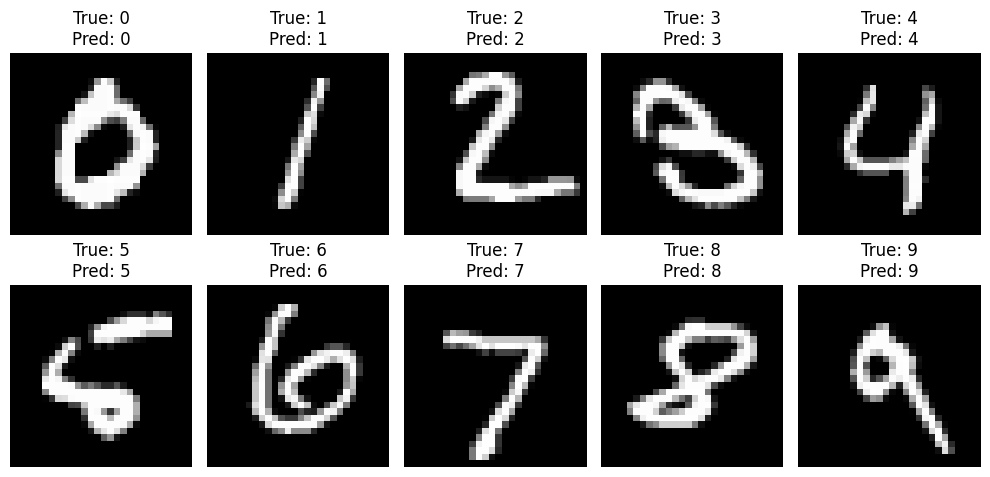

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize input images (scale pixels to [0,1])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build Feed Forward Neural Network model
model = Sequential([
    Flatten(input_shape=(28, 28)),              # Flatten 28x28 images to vector of size 784
    Dense(128, activation='tanh'),           # Hidden layer with 128 neurons + tanh activation
    Dense(64, activation='tanh'),            # Hidden layer with 64 neurons + tanh activation
    Dense(10, activation='softmax')              # Output layer for 10 classes with softmax activation
])

# Compile model with categorical crossentropy loss and adam optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1, verbose=2)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {accuracy * 100:.2f}%")

# --- Prediction and Visualization ---

# Find one example for each digit (0-9) in the test set
sample_indices = []
for i in range(10):
    indices = np.where(np.argmax(y_test, axis=1) == i)[0]
    sample_indices.append(indices[0]) # Take the first occurrence of each digit

sample_images = X_test[sample_indices]
sample_labels = np.argmax(y_test[sample_indices], axis=1)

# Predict using the trained model
predictions = model.predict(sample_images)

# Get predicted digit (index of the max probability)
predicted_digits = np.argmax(predictions, axis=1)

# Plot the results
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPred: {predicted_digits[i]}")
    plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
#feed forward neural network using sigmoid activation function in pytorch

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out



input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()


learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())


<generator object Module.parameters at 0x786bff466ea0>
4
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [ ]:
#feed forward neural network using TanH activation function in pytorch

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.tanh = nn.Tanh()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())


<generator object Module.parameters at 0x786bff4673e0>
4
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])
